In [1]:
import io
import base64
from PIL import Image

In [2]:
b64si_ubuntu = "R0lGODdhyADIAOcAANQCBPyCNPzCNPzCnPxWBPzinOyChPxiBPzi1PyibORiZPzStPzy1PyyBPyyhNwiJPxyHPzObPTS1Pzy7PySVNQSFPTCxORCRPzuxPyaZPSipPzq3Py6JPSytPzGVPxqFNwyNPx6LPzaxPzizOxydPzahPz67PyKRORSVOySlNQKDPzKpPyqdPy6jPzqtPy6HPzWdPzq5Nw6PPza1PzCRPzirPxiFPzi5ORqbPzy5PyyFPxyLPyaXNwaHPTKzPSqpPy+NPzOXPxuJPx+PPz6/OyanPyGRPxeBOyKjPzenNwqLPzWxPz27PyWVORKTPS6vPxuFPx+LOx6fPyOVORaXNwKDPzOtPyuhPy+nPzu5OQ6PNwGBPyGPPzGpPxmDPzm1PymbPzWvPz23Py2jPx2JPzSbNwSFPzyzPyeZPy+LPzKVPzexPzqvPzelPz+9PyOTPzOrPyufPy+lPzWhPze3PzGRPzmrOxubPy2FPzOzPSurPSenPzS1NQGBPyCPPzCPPzCpPzu1PxaBOyGhORmZNwmJPTGxORGRPSmpPS2tNw2NOx2dORWVOyWlNQODNw+PPxmFPzm5ORubPz25Px2LNweHPTOzPz+/OyenOyOjNwuLOROTPS+vOx+fOReXNwODOQ+PNwWFPzW1PzipPxiDPzSvPzy3PyyDPyyjPxyJPzy9PySXPzuzPy6LPxqHPx6NPzajPz69PyKTPzKrPyqfPy6lPzWfPzq7Pza3PSqrPy+PPzOZPxeDPz29PyWXPxuHPx+NPzu7Pzm3PymdPzSdPyebPzKXPzezPzqxPzGTPzmtPy2HAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAAyADIAAAI/gAvCRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KdSiRr0S6ii2ois+TXHuK7NmTi5OosGO10ulggJGMQg8eVHqgRAaVTB2CxbUarMMdTWb6bAHAuDGALaE0LUrUa7BUUQYUVXG8uLNjAFUUDbph2WkvCwpCNfbM2DPrUJ5wlV5KhNMmM49zt9ade3FvT3RmJ81DpQ9v1q53565C5ZZwo3QkfVrdW7dv646rdIL7PKgqDZWU/l+vjp18pUTdhYpCsds38vbkrzNynt6nqiI9qJff7353KD31+XSDAtX1VyB85fVBiCoB7lSbFp+Vd52B43WmSR4NikQEE6pkkcUGH4bYCxPcHaTKHhX0RiF8K45nRi4ZbhRLDMeE0cUYtCTAwxt+cNGjH368kQAatLTQRSnHxFBiMIPwJqFy2PW3mAqZxGhRL8fMgkoCJ5ABiQ02kHKAmAeMWeYBR5CiJpiQkMGDMARFsgiLB0p5HG8qLGKlRBPAcUUTwEDCyxEH8GKmmWoiKqaYaaYpSAAIEESHJ9RVyBmUrPXWxyIl7plQLwsMYwQEpBxB6KKKIjrmoqyaeYQR/htISkV8UYpXZ2NVcOqpQhtcwcUvpZ6aaqJqEotqol6Q4gWakBI0IJ0H0nrnFpt2uqtAIqCRihemqorsAcsmGy644Co75rKoHpBKGATdIsVnyUn73nUqSGGtpwhMseypya4qZr/ElnmsmeiaKyYvHyxAUDBIkIegrfIC4Mge1xaEhSCronsuuf9uLG654S66LMGFYkFQLxrkFy+0mU7ImBnoVTzQBm9gjKrGaha8qrc857woL7QQRIQPoFQa7ZMOyyCbzAIRMQskaeqc885ThxyywceS+UasA0UiScu2tghvtUwPlEMGwnasKs6JqorouOge4coSJ+tRiH4uQxzt/gOG7BlLQkSEQQa/54qcMccGF8x2uWo6UCIdCig2LcRgP3bHvc+5gUwJYiQ0wTAjE4vzsBsH3DHAY/rBddOcaGJ0rZMvpgkfMZowChDLwGJCQscAk+bGa5c+usbJml4mJCa3m0klK97pMGOhFBGjGHO0gscpQLDx6RgfDFs8x2wr/nbpysJa0A2LqEZ5xFt8IkWMDETwgg546KDDLpMktIEsVBs+NaujM5yiRvYBB1RGUlLIT7Ty5p4K2CtDGDDGMuqHBwom4W8HiUUXfuGxnpHLW4vrl6LIYAWD0MEAmrAUy/qgBCQcsD6aMwYF8TDB6/0hEAnJQgYE1sGrKetf/jczF8DQRURZRKogt0AECiohueflphIo6AAG6xMLZSRjhhS03ymIsbuDEGEBlIga6UJHvHQNbGAfQEMWDNILCaRgE0rAjdFCoQQUNAIXmJsNG5JhvwrWb4IT1MEylOE5FpBJiIwrl/cOhzU00mJ1BFGFKPQgBRRcQBEgAIEiLsCITnRgBnmcDQbU4MdlCLKC9KPfKdRgCoQQQQR++J2xygg3RgKwdGb6xTC+4MpgIEACFuDEEwwhikioIpSilOApZ2hKGqKyBJ4bAyTGh0tWFSt0JBvfoo7wAR6E4YUViYVgZhM/QP7xnH5EZRqQwbs3iPGHBDvdmUSWNcSN6wCQ/jCCHISBTMAJA0drtIwYiMEBLDozlaasoQ6C0EU2YuEXaUOcvwpXRvIZjGrqQsMsNjDFhvRiA7Nowge8QAsmDMYEsGgFQlP5R0HSL4vLaENCvrDDjlWNTIQylU51Oj4ycgxRIcgAII6RhVASIQvHkEMGwoimX2Chn1Sxwx/oV0NnVrWUftTBH1iBkFjMghICMxeauvWBX6TiFWh9BTBekYpffGCnGDWWq0hBiTfQYgBIQoCHshCDL4hgAQNIgCxSYapiHSEEpRgLBjzAUpfCdKUtxQMXERID0LkqTakIwBSKQYtaDAAOC7BCaK0wABxlYApDgACaGEnEqZnqA6kA/sYJfJGAYQwjAb4wAlu5RahDleoNvOTKJIhRw6ua05kVNKcOTtEKOySkFH5AkxdS8YZhYKEUCNjABJgAzksQIRYTmMAGEBAGOQxjCqmYJ/AGNtZzjTRZPPWfyIbRXavEIglpaGwzUwlZlqIyGa08yATGkAousKALx5hAfRnSi2CMoAssMEL3Dmm1ieLUt8jyX6FS0YWtYICPyaUhVa2KVeVSdQ4dJcgXZiGComKECBNYwhjeAIUzkmtcxbrlEBl5gBMc8SqTsEUgsWjKlzpWvyLGQ/YA5xEmHGMMEibUx2Z544vaNHgfGEaKp2IHIKAykM0M8UvNGWaWGiN/KGGC/ggcEIJSsZZ0QhSdROk6i6swYBcULO6X85xFLJ6SqjJVSTDgINLe3uzGP9XwNQnmi4BO5b4c0O+IxUxmESuUgro4w0qIMAI2a7NYh5tyhUsHgeRNhQFqOEWIswpZVNbvpa4OpA6SgcNNZwEQ0T00joPXtiuL6Q0/hkos2rDflhbXyKdUaEL77AFkuMElvbDCG8K6yO/FWXxi+sUYoFoUBnhA1cfdc4iHvMxz0s8YZ3j2S2IRhjcYjog723WrWtXjY0Rl2PPLokvJHeY9L7OPERADt0kSi1K4O6zHkhrIqqwxIZjaKaYwxikQitxJZ9W4jVUDA2oSuBMEMYBWtrGa/poAJ6e4YRStOMWlR7xSfrN0gqegwcZtQoRSnICHQNz1x3auyCPsoM5OYQIMJj5uPlfVfsctcyu0hxMNhuCdA+RZXMUEiQRMwCkYmKqrWd7nf0e2maPYSS8cwMFvJU5413bVEOzNlPuqOtlGJ/E5y3y9MvREhyFLtDZxvvBf1GLgPZlEGd7+2K5z/eI6AEKAebKE6PorzhetcNYokAOmYMDLci/6sS29zFMQ0iexGEPZQ3dl1OX8g8Cgm1LckASi87fYrfZv/U6xi4b2hGY8lHfO542qX6Biy0SBNMX1fNx/AxLpTP+J03aQJlBXzbe1BBgPTKqUWHTZv0fmMzpf/nqKMgB/J1logjyzpnuMGoHtOPkuE8I7gRz0ohd5/LC/SUzxMV+PA58XSheYv3fyV3NZIdBhNMcECDAAw7AKb5CAb+ALwzAAXwB/BxEIyuRqfPZn+kZ7C9YTwkAB8rVwPqVhH3AFNjEBVoAGQ/ABgpCCBKCCgvABwIAGYXB1BsEKV0RVjZVOSZZQo/B9PYEKrhBWIAcwZ6QsPCCDMdEL2UJY3cIzOpUKwyAMW+YCNABrylVkYhZznVMUYZBrUUc84OM/sjACMjEBuLZa8IZII3MEXuAHs5BisVAA1nNkzXR8rkYMPNgTE5ABilZNxrMoAVBCMDFgZEBtZtc/Z0IJ/l3QXcNVVUNGgYJ0CvinbkXBPbrmPzg2ZeoiB4E4BqqVYYhjU1ITgN2FDFPITF+HSn+weEVhBcCgKEC0XomGLgW0bl3QZj0TZx50ACEAdAOBUscne8VmDLZHFDTzbnyIbQSjZS6xBDcXT/LmMa9YLMBWEBhQilblWF9WAsPoFWgQQNCIUTjjBWrUEhPAAm/lfKE2Z/FUJh9AC+A0CTBgZOkEZjSkDHf4Ew7wg1ijcDx0KGhCChQQbClhBbGUcN5iiXF1AMDALgRxO32UUPanAxzAVUkBCKq1Wjl1JoX1AZDwAR7pBWWVCiLpC2K4EhNACxNWeuSzkogkNw7QUTSo/mo4iI1poIpGIQK59SN+IAtvMAU+6ZNNAAbDIJRC2Vm1IAdyYAVGmBLH4E68Rz7yRnocA1wEIXgtd1D1kwxohhS9gADH8JXHsAbCkAPtV5bbNSJoyQSx8F1f0RKz8AqyBD6HQzUjI4SMQgkK04uw0G8vV0EesJVlgxG9IHpSZnZihYt0eWNH4HAEcXJAoHIjdmn4E5gakQWWZVO9pkjWBHJUFwcMMhDK8Jhbx3K2sI2UORExgDZUBk839VOidjzDsJRs8AcqJ3dUNVmneREbsAqC4GskU08DgzMfwAKySZv8ZWn1g5u5WREb4Au9aYwBE324aC5HAAnESRBsoAvg/oaDFDSZy1kRWVAMiiZ5cmWQiZJl1CcQs/l2EHlQagCYRxEJN/CZQTEBcTBN69hrafdDpjcmrjAGHdVlMglrNlgH8FkUuCAFVEAId0ACDvqgD9oJKTChFFqhe2ABkbASvSAHhAVq/fI9IIRhG3MEHEYQw6ZS10huNakUT5BCj9EHMBqjMWoGPdADlVCjOHqjheAJGLISpQCXfEcmPOdTebcoQyACBGECc0Bu4iaRGKAUjdADUtIZ80Klj7EFF9A3K/EFvvBmpmNNFqaZGeBolyAGEkdpe7YMdgB4OSEFuNE8duIkAIACEsASvVALENUzlyiXRUqiD3cJbEADhKds/l+mO0hBBJ6gAuvjJHayBQqQoSwhAvzjiToTjjh3LBRQcgIRC7AQaSI2aX+mBulZFKJwAckxL0izBSSQgSVxp+kVT/8jX3tKCmQwACUiBrsAa6h0g9gzc0ahB0qgH/xxK59gAC+xAQmQksBzhgcpMB+QAJVHEDWQX8ameRI5CpJIFIOgGgyEKVDyGD2QAjAhAgcnQsWjY8IDLltTEGIQAX2WXDdIP8o5FJFABYq6QNBypYwBAjHjEoHjbmqYmJaaKIRyAsfQKSg3bn1ZVafwB746FImgBHD6MC1zAXUKE//KLYjUf2OihhRwsAXBCqTURxSnb0W2DElQFERgANy6/qinWh1UME4x8QXD8AuCcCqmUzBHIAhQQAsuVpVCBneEWm7LdWZEwQeHYBz46jzU8QmdUBNMMAsU4AUpWCZTtrMt2ARWUF/D5qldx4jbh39esQcPwD50whpK8AM0lwVwkABc4AUrGLcE8AFcQAtWQCIGcV9pQHSVFllJRj8NUHtCgQuboLRxyrSZcgGWkBO9IAwiMAtj4AC0IAdwIAIbgDlvmHJ/C1N5FpGClH8+QQRkm6pnWymeILMO0jQKgVKean9Jl06OZUqBe481IQpOgDcUGzbQ40JLYQJC1rlf+3p9WUGnkLI+0QsGkCKNajSHuwWKoKVKIXgySXzIZZsu/gcEWcgTiaAIh+sw76EbKEAaS3FfJNt1kVWySeZHxtATuIACBoKv3QqumcCqRMEKggqvywa2/PZlqmS8OXELizAdsNOt3ysDPcoUvjtxuvpYSPaQWSW2ONELjVC2zxOn8fsJOEAfTOEGymA951tsyNVvF3c9AsBONtELegACqPq9L5sbSgAgT2EKQUB0q6ZcRPZnRzdrD3uEHVA0uBu/T6ICjBAcTyF8m7uwwChu12MMOwxtPcwy6/O9AFAJjSAVDCBxrru5c9eX9sNSasAK2WqnT+y9UHwpveEEFytsSVBQN3hQ7Tl/xYcHNJB8LHELueDDKvS+y6sbPVAlpzay/teITiM8ZITaTLtAuyBBBHSQAq6zvJUTLxPiBKJAFbGAcvK4cssWr3+GULBgp3kgCeGRN4x6NHZSCdJTFaaAZ8YHdwobbljpAdl7EkRwA4jgBI7gyEeDNK1BBZBaFVJFoFnVUgS6X/t1rSpxC09wB3cjrN6au6daCB2AFUywpFscbieLVbAruCcRCRYwCFpwry8rNgjiMp+wCPT7FCILwoX3t8RsP2kAukiUCIlAB+fcEIrcAVKgBY7wMLHzOrXSB4ewNFhRyV62TOFm0FiVSjDwfSisBUqgAI3ACTcAgQ9BBL1wA5zQCApQCJtBKxbszOXxADCyFZMwB/n2apwb/ryvpgsUeRC4QClb0D5aQAhIkAuGQAe3EAyqAH/v936qEAy3gAsWkAuDcAcy8Ami/NHOkylQYgZSsJRZwQpBMIf0R2JgiwewEMYDcSLh8RlVoASH4Al3IAVIsAcacNYagAlI0Al3QAUXILGlq7u1gsudMcRjoQylWL7yKLz2QwOxXBA+cLu5DBoVUAiGbdgPEAr3asaTs9TN3Dya8ARxYQL4lcV6xp3LUAAJcQtI8KZyLadxrceLGiG63AOYUM9VUdIq1VhyaG4eYJreZQE+vB/SMsC3kq/gWghKsNtKUAkCjB1mYABQLRYMQAwvgL+xNmkQfBByoqjiLDai3M/K/vEJWqAABtAIiIAIP6Ddar0IVOA6vSEJMSAc5TTMzJRKu6DVAtELHQDXkDzO3vre48EbmnAHEU0HOt3TPK0KtzADHYAEjIAbCkDEwiHVVC1mr5YGLW1ChDDfUvwkBMy8AMBCkzHR/UQEkoQJnTDJ6cEGatDOJHYKJYA5J6I+MT3KLAw7tg0AsNEBkcCmAqHBHe4BV8VSMdfEA2G7uusyPA7fe9wHIJAJuIDIMkMEGLALyzBxJpYE6n0JqpAC+/y+Ufw6zWMdF5ALMn4QbjAJRF4frBABRZZKpwDLrpQHKrzjED7akPwIT5CBYsAGowALc1AGxFACbVADrADbDcIA/rZw3I/IAaOAOQBsHKKNuz88rLlxAZywYAwAC8agCxywDIAk6RxQB2UwCnpeH5OQUrNntF6UCGUrxSn+3ksLAh1QX2IAC8nQuuYrSK2gBmG3K1U0heu02YyQx45Nxh7dGn1cX2xgDKwOu8KOB60AA6MaI24g1fN6MhrQsvI95ahaIKdbEJX8ByBcsnQnSEGA4w3CBHp+A4dg6D0u5dFdIUrgA9R+O0RW1TZ4cTRgk2XTC0gQ5VMu4bhcHY7wQAShDH+AeF+LTnNIPwyVm3wA17RN5Qjv40pA4AIhsq0myOY2k/QzB6epCu8y1/r60T2+Hyqwqkm6pAtsgRbIv7Db/grwXDGJ0NG5LtoTGyU9YAEFwQYFvav7u8lltl+0l+kxQgc4MB0t37wu6xgX0MuXwAQlYIqXHcIVd2n18wInfy29IAoJFDEYH86VUi/gxADJQHh7nX1GBmYibwu5OctFcAGhoLS6jLjwbQaI0Jh2sNpLj5XKNvKdewoA9p1EkAedAAoPoPKNvccG8vIfP0NI54j0iHh0aD8c8KTfud6GAOBaUAkqAKMO/q20/QCLOxDSy3VIR/cib771UwONXxD3XNSboAiJ7QifMPmSoxiurwJV4AiOYAYPoAUoMBoEYaYNgO0zCfaBTGb0E2ijbxBEcAt8wAmIUASdIAV3wAib/oACmxD9m8AIJLAIg1AEP8AJEjDeBWEK36ZvXdyeFudn7+q/w68QYdELt3ADkdD+N3ADt0DRCuFt2+nKq/Z6aYqV5n/+IWEKqYZ9AIFHxzIdA3XgwUNwGcKBAg8WFIgnySWKFS1exJhR40aOHT1+BBlS5EiPk8qcOrjQIMKEDxcyfJlQ4MKXo0jexJlT506eJE3MeRgx4suULiOuVDkTQ0+mTZ0+hRprFIdTMl8SnAmTJVaGCLHSMAVV7FiyZTGyolE1aNCkMIsaxKrjFLFYZu3exYtzErGhLdu2PNjSK8uhdvIeRpz4ohtlQIIKXZlSaNyZBdVMUpxZs91JMPpa2B2cNXBllS9sbkad2imyZEcdHk2q8u/BCCZU38aN00QSIFlpypRc1CtED6xyH0f+cRKs3oHZTt4a9A+b5NWtY1zuGPbouHEPJlN2Xbz4SUmSLau6HbLAUxx2IRsf33osNjCAoH+c9FT7ZLAYyAewOlPssCWZNNDbL8Fl/lADFgzqCjBC5CZBZpQSiIlADWPKIKYNZRiwTUIRkzOBCTEYMGUSE2IhYkQXX4QxRhlnpLFGG2/EMUcdd+SxRx9/BDJIIYckskgjj0QySSWXZLJJJ5+EMkopp0QuIAA7"

In [3]:
f = io.BytesIO(base64.b64decode(b64si_ubuntu))
pilimage = Image.open(f)

In [6]:
pilimage.size

(200, 200)

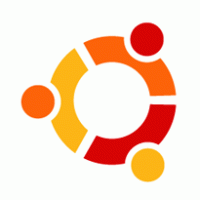

In [19]:
pilimage

In [11]:
pil_am = Image.open('am.png')

In [12]:
pil_am.size

(64, 64)

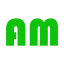

In [13]:
pil_am

In [15]:
with open('am.png', 'rb') as image:
    b64si_am = base64.b64encode(image.read())

In [18]:
b64si_am

b'iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAOxAAADsQBlSsOGwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAANfSURBVHic7ZlLaFxlFMd/597b4MwkmWmaQpHgo4hiEXwsFCozsTWrbERdqXShoKBxId24UnCr+ATBx8LHQtBY7MaVSiSNEV36oqCgBReB1nbmJpmkydzvuIiRmfQ+5g5Dhzbnt5rvO//vf8535r64FwzDMAzDMAzDMAzDMIzdheRdsHehcJ2qd586DiGyD9GioBecY0nwFkf2rHz/92HW8vpW5q65wQXBtKfuVpCKwpIIv+1pFWfPHjm7ErdmfKF47YbzHgY96MF+ROuo/OHU/zKcDH/vJm/XDSjPl+4HXgRqGdLzir4RRs1XOMJ6lu/o4ugYreg1gWOAFyMJVeSFsLry1vbExCKF5dbwm6BPAH7MGgU+1cCfCQ+H59PyZzfgM/zRA6WXBY5najuM9btow39geWr5nyTN2FxhIvK9r4FbMv1E365Xm8+OL4yPbLq1b4G7uijiFwhqjWrjQpIkruMdlA8Mv5N38wCK3OsPuQ/RhCb/ylDkeyfoYvMAqjJTOVV6fDNa/4huNr9VxG2qrdfTJKlHwOip0jFRPu4qWWICfbBea57cOV+eLz4J8l5OO0cXf9olazS6qTG5/mdcMNlsjkCUl3ImuwRFno4PyDM92OXd/NYaz3s0t2HFK04DN/aQcCdHJxYptE+MzI2MI9zeB++uUCf3JMUSG+A8Odqn/EFjo3BHR9Igup4ebsG9IsLNSbHEBojK3Rm+PwJTqjwGhOkFeAd3zOzN8L4o4h5CeDVDB+hTojyXLqGSFEo5p9z+VFNPZxq11W/CydVPUD5P10q50zrzXF6oV9e+8EU+yNCdadSa79fd6rupKqGYWFrKqrEUS22EzZ//H4